# Preprocessing Categorical Variables

In machine learning, most algorithms require numerical input data, so categorical data must be converted into a numerical format. Two common approaches for this are label encoding and one-hot encoding. We learnt both methods in `Unit 1.8`, let's do a recap.

## Label Encoding

Label encoding is a simple and straightforward method where each unique category value is assigned an integer value.

### How it Works

For example, if you have a `color` feature with three categories: `red`, `green`, and `blue`, label encoding would replace them with `0`, `1`, and `2`, respectively.

### When to Use

Label encoding is ideal for ordinal data, where the categories have some inherent order. However, using this method on nominal data (no intrinsic order) can introduce a new problem: the model might assume a natural ordering between categories which may result in poor performance or unexpected results.

## One-Hot Encoding

One-hot encoding converts categorical values into a binary vector representation where only one bit is set to `1` out of all the bits representing the categories.

### How it Works

Taking the same `color` example: for `red`, `green`, and `blue`, one-hot encoding would create three features, `is_red`, `is_green`, and `is_blue`. If the color is `red`, the corresponding feature `is_red` would be `1`, and the rest would be `0`: `red` = `[1, 0, 0]`, `green` = `[0, 1, 0]`, `blue` = `[0, 0, 1]`.

### When to Use

One-hot encoding is best used for nominal data where no ordinal relationship exists. The downside is that it can lead to a high-dimensional feature space, which might be problematic for models that struggle with high dimensionality.



We can implement label encoding and one-hot encoding using `pandas` or `scikit-learn`.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.DataFrame({
    'color': ['red', 'green', 'blue', 'green', 'red']
})

# apply label encoding
df['color_encoded'] = df['color'].astype('category').cat.codes

df

,color,color_encoded
0,red,2
1,green,1
2,blue,0
3,green,1
4,red,2


In [4]:
# apply one hot encoding
df_one_hot = pd.get_dummies(df, columns=['color'])

df_one_hot

,color_encoded,color_blue,color_green,color_red
0,2,False,False,True
1,1,False,True,False
2,0,True,False,False
3,1,False,True,False
4,2,False,False,True


In [5]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [6]:
df = pd.DataFrame({
    'color': ['red', 'green', 'blue', 'green', 'red']
})

In [7]:
le = LabelEncoder()
df['color_encoded'] = le.fit_transform(df['color'])
df

,color,color_encoded
0,red,2
1,green,1
2,blue,0
3,green,1
4,red,2


In [8]:
# reshape the data for OneHotEncoder
colors = df['color'].values.reshape(-1, 1)

encoder = OneHotEncoder(sparse_output=False)
colors_encoded = encoder.fit_transform(colors)
df_one_hot_sklearn = pd.DataFrame(colors_encoded, columns=encoder.get_feature_names_out(['color']))
df_one_hot_sklearn

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0


# Preprocessing Numerical Variables

Preprocessing numerical variables is crucial to ensure that models perform optimally. Common techniques for preprocessing numerical data includes scaling, normalization, and handling missing values.

## Scaling

Scaling adjusts the range of data so that different features contribute equally to the final prediction. It's essential when using algorithms that are sensitive to the magnitude of the variables, such as Support Vector Machines (SVM) or K-nearest neighbors (KNN).

### Standardization

Standardization rescales data to have a mean (μ) of 0 and standard deviation (σ) of 1 (unit variance).

$$ x' = \frac{x - \mu}{\sigma} $$

### Min-Max Scaling

Min-max scaling rescales the feature to a fixed range, usually 0 to 1.

$$ x' = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)} $$

## Normalization

Normalization adjusts the data that they measure the same scale. It's often used when the data follow a Gaussian distribution or when the scale of a feature is irrelevant.

### L2 Normalization

L2 normalization scales input vectors individually to unit norm (vector length).

$$ x' = \frac{x}{||x||_2} $$

## Handling Missing Values

Missing values can significantly affect the performance of machine learning models. Common strategies for handling missing data include imputation and removing records with missing values. You've learnt about this in `Unit 1.8`.

### Imputation

Imputation fills in missing values with a specific value, such as the mean, median, or mode of the column.

### Removing Missing Values

If the dataset has only a few missing values, it might be reasonable to drop those records. However, this can lead to loss of valuable data.

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

In [10]:
data = {'feature1': [1, 2, 3], 'feature2': [4, 5, 6]}
df = pd.DataFrame(data)
df

,feature1,feature2
0,1,4
1,2,5
2,3,6


Standardization

In [11]:
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_standardized

,feature1,feature2
0,-1.224745,-1.224745
1,0.000000,0.000000
2,1.224745,1.224745


Min-Max Scaling

In [12]:
minmax_scaler = MinMaxScaler()
df_minmax = pd.DataFrame(minmax_scaler.fit_transform(df), columns=df.columns)
df_minmax

,feature1,feature2
0,0.0,0.0
1,0.5,0.5
2,1.0,1.0


L2 Normalization

In [13]:
normalizer = Normalizer()
df_normalized = pd.DataFrame(normalizer.fit_transform(df), columns=df.columns)
df_normalized

,feature1,feature2
0,0.242536,0.970143
1,0.371391,0.928477
2,0.447214,0.894427


In [14]:
normalizer = Normalizer('l1')
df_normalized = pd.DataFrame(normalizer.fit_transform(df), columns=df.columns)
df_normalized

,feature1,feature2
0,0.200000,0.800000
1,0.285714,0.714286
2,0.333333,0.666667


You learnt about handling missing data using `pandas` in `Unit 1.8`, `sklearn` also provides utilities to deal with missing data.

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
data_with_missing = {'feature1': [1, 2, None], 'feature2': [4, None, 6]}
df_missing = pd.DataFrame(data_with_missing)
df_missing

,feature1,feature2
0,1.0,4.0
1,2.0,NaN
2,NaN,6.0


In [17]:
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_missing), columns=df_missing.columns)
df_imputed

,feature1,feature2
0,1.0,4.0
1,2.0,5.0
2,1.5,6.0


# Classification Metrics

In the previous unit, we used **Accuracy** to evaluate classification model. However, there are many other important metrics widely used to for classification evaluation.

## Accuracy

Accuracy is the most intuitive performance measure. It is simply the ratio of correctly predicted observations to the total observations.

### Formula

$$ \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Observations}} $$

### When to Use

Accuracy is best used when the target classes are well balanced. However, it can be misleading when dealing with imbalanced datasets.

## Confusion Matrix

A confusion matrix is a table that is used to describe the performance of a classification model on a set of test data for which the true values are known.

### Components

![confusion-matrix](../assets/confusion-matrix.png)

- True Positive (TP): Correctly predicted positives
- True Negative (TN): Correctly predicted negatives
- False Positive (FP): Incorrectly predicted positives (Type I error)
- False Negative (FN): Incorrectly predicted negatives (Type II error)

### When to Use

The confusion matrix is not a metric but a helpful tool for computing various metrics and gaining a more detailed insight into where the model is making errors.

## Precision

Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.

### Formula

$$ \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}} $$

### When to Use

Use precision when the cost of a false positive is high, such as in spam email detection.

## Recall (also known as True Positve Rate or Sensitivity)

Recall is the ratio of correctly predicted positive observations to all observations in the actual class.

### Formula

$$ \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}} $$

### When to Use

Use recall when the cost of a false negative is high, such as in fraud detection.

## Specificity (also known as True Negative Rate)

Specificity measures the proportion of actual negatives that are correctly identified as such. It complements recall (sensitivity) by focusing on the model's performance with the negative class.

### Formula

$$ \text{Specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}} $$

### When to Use

Specificity is particularly important in situations where the cost of a false positive is high. For example, in medical diagnostics, a false positive might lead to unnecessary treatment, which could be costly or harmful.

## F1 Score

The F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.

### Formula

$$ \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

### When to Use

Use the F1 score when you want to balance precision and recall, especially if there is an uneven class distribution.

## ROC Curve and AUC

The Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) are powerful tools for evaluating the performance of classification models, particularly in binary classification. They help in visualizing and quantifying the trade-offs between true positive rate (sensitivity) and false positive rate (1 - specificity).

It is created by plotting the TPR against the FPR at different threshold values. A threshold is a point above which a given observation is classified as belonging to the positive class.

![roc-auc](../assets/roc-auc.png)

### Interpretation of the ROC Curve

- A curve near the top-left corner indicates a good performance.
- The diagonal line (FPR = TPR) represents random guessing.
- The area under the diagonal is 0.5, which is the AUC for a random classifier.

### Area Under the Curve (AUC)

The Area Under the Curve (AUC) represents the degree of separability between the classes. It is used as a summary of the ROC curve.

### Interpretation of AUC

- AUC = 1: Perfect classifier. All positive instances rank higher than all negative instances.
- 0.5 < AUC < 1: Good classifier. Higher AUC indicates better performance.
- AUC = 0.5: Random classifier. No discriminative power.
- AUC < 0.5: Worse than random guessing, but by inverting the predictions, it could be useful.

## Advantages of ROC and AUC

- **Invariance to Class Distribution**: ROC and AUC are useful especially when dealing with imbalanced classes.
- **Threshold Independence**: They measure the quality of the model's predictions without tying to a specific threshold.

### When to Use

ROC and AUC are useful when you need to evaluate a model's performance across different classification thresholds.

In [18]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

In [19]:
# generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=0)

In [20]:
# split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

In [24]:
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {roc_auc:.2f}")

Confusion Matrix:
[[ 90   3]
 [  4 103]]
Accuracy: 0.96
Precision: 0.97
Recall: 0.96
F1 Score: 0.97
AUC: 0.98


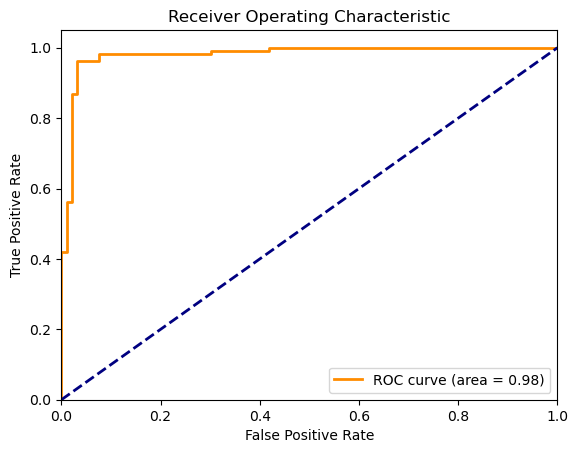

In [25]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Choosing the right metric is crucial for evaluating and improving classification models effectively. It's important to consider the business context and the costs associated with different types of errors when deciding which metric to focus on. By understanding the strengths and limitations of each metric, you can develop more robust and reliable classifiers.

# Regression Metrics

In the previous unit, we used **Mean Squared Error (MSE)** and **R-Squared** to evaluate regression models. Here we'll cover other widely used regression metrics.

## Mean Squared Error (MSE)

Mean Squared Error is the average of the squared differences between the predicted values and the actual values. It gives a higher weight to larger errors.

### Formula

$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

### Interpretation

- MSE is sensitive to outliers.
- Larger errors have a disproportionately large effect on MSE, making it useful when large errors are particularly undesirable.

## Mean Absolute Error (MAE)

Mean Absolute Error is the average of the absolute differences between the predicted values and the actual values. It gives an idea of how wrong the predictions were.

### Formula

$$ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$

### Interpretation

- MAE is easy to understand and calculate.
- It measures the average magnitude of errors in a set of predictions, without considering their direction.

## Root Mean Squared Error (RMSE)

Root Mean Squared Error is the square root of the mean squared error. It is one of the most widely used metrics for regression tasks.

### Formula

$$ \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $$

### Interpretation

- RMSE is in the same units as the response variable.
- Like MSE, it gives a higher weight to larger errors.

## R-squared (Coefficient of Determination)

R-squared is a statistical measure that represents the proportion of the variance for the dependent variable that's explained by the independent variables in a regression model.

### Formula

$$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $$

### Interpretation

- R-squared values range from 0 to 1.
- A higher R-squared value indicates a better fit between prediction and actual value.

## Adjusted R-squared

Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model.

### Formula

$$ \text{Adjusted } R^2 = 1 - \frac{(1-R^2)(n-1)}{n-p-1} $$

where:
- $ n $ is the number of observations
- $ p $ is the number of predictors

### Interpretation

- Adjusted R-squared penalizes for adding predictors that do not improve the model.
- It's used to compare the explanatory power of regression models that contain different numbers of predictors.

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

In [28]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")

Mean Absolute Error (MAE): 0.50
Mean Squared Error (MSE): 0.38
Root Mean Squared Error (RMSE): 0.61
R-squared (R^2): 0.95


# End-to-end Workflow on Titanic Dataset

We will apply all the above on the famous Titanic dataset to predict the survival of passengers.

## Dataset Overview

The Titanic dataset contains information about the passengers, which includes their age, sex, ticket class, and whether they survived the sinking of the Titanic. Refer to the description and data dictionary: https://www.kaggle.com/competitions/titanic/data

In [29]:
import seaborn as sns

In [30]:
titanic = sns.load_dataset('titanic')

In [31]:
titanic.shape

(891, 15)

In [32]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [33]:
titanic.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [34]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## Preprocessing

Before applying machine learning algorithms, we need to preprocess the data.

- Selecting the features / variables that we want to use for model training.
- Missing data can be imputed or removed. We will drop features with more than 50% missing values. For simplicity, we will fill missing numerical values with the median and categorical values with the most frequent (mode).
- Categorical variables should be converted into numeric form. We will use label encoding for binary categories and one-hot encoding for multi-class categories.
- We will standardize the numerical features to have a mean of zero and a standard deviation of one.

## Model Training

We will split the data into training and testing sets and train a logistic regression model on the training data.

## Evaluation

We will evaluate the model's performance using accuracy, precision, recall, F1 score and AUC.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

In [50]:
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
target = 'survived'

X = titanic[features]
y = titanic[target]

`sklearn`'s pipeline is a tool that allows us to assemble several steps together. It sequentially applies a list of transforms and a final estimator. Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods. The final estimator only needs to implement fit.

In [37]:
# preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, ['age', 'sibsp', 'parch', 'fare']),
        ('cat', categorical_transformer, ['pclass', 'sex', 'embarked'])
    ])

# define the model
model = LogisticRegression()

# create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)
                          ])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipeline.fit(X_train, y_train)

preds = pipeline.predict(X_test)

In [39]:
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

In [40]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f"AUC: {roc_auc:.2f}")

Accuracy: 0.80
Precision: 0.75
Recall: 0.74
F1 Score: 0.74
AUC: 0.87


> Now, recreate the workflow but use min-max scaling for numerical features and KNN classifier for model.

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, ['age', 'sibsp', 'parch', 'fare']),
        ('cat', categorical_transformer, ['pclass', 'sex', 'embarked'])
    ])

model = KNeighborsClassifier()

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)
                          ])

In [43]:
pipeline.fit(X_train, y_train)
preds = pipeline.predict(X_test)

In [44]:
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

In [45]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f"AUC: {roc_auc:.2f}")

Accuracy: 0.81
Precision: 0.79
Recall: 0.70
F1 Score: 0.74
AUC: 0.85


# Understanding the Bias-Variance Tradeoff in Machine Learning

## Introduction

In machine learning, the bias-variance tradeoff is a fundamental concept that describes the balance between two types of errors a model can make: bias and variance. Understanding this tradeoff is crucial for creating models that generalize well to unseen data. We'll explore what bias and variance are, how they affect machine learning models, and strategies to achieve a good balance between the two.

## What is Bias?

Bias refers to the error that is introduced by approximating a real-world problem, which may be complex, by a simplified model. In other words, it's the difference between the expected prediction of our model and the true values. High bias can cause the model to miss relevant relations between features and target outputs (also known as underfitting).

### Examples of High Bias:
- Linear regression on non-linear data
- Assuming simplicity when the data has a more complex structure

## What is Variance?

Variance refers to the error that is introduced by the model's sensitivity to the fluctuations in the training dataset. A model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn't seen before (also known as overfitting).

### Examples of High Variance:
- Fitting a high-degree polynomial to data with lots of fluctuations
- A complex decision tree that creates a branch for each data point

> We will learn more about decision tree in the next unit

## The Tradeoff

The bias-variance tradeoff is the balance between the error introduced by the bias and the variance. Ideally, we want to choose a model where both bias and variance are as low as possible. However, in practice, decreasing one will often increase the other. A model with high bias (simple models) will not be complex enough to capture the patterns in the data, leading to underfitting. Conversely, a model with high variance (complex models) will capture noise in the training data, leading to overfitting.

![bv-2](../assets/bv-tradeoff-2.png)

### Visual Representation

Imagine a target that we are trying to hit with our predictions:

![bv](../assets/bv-tradeoff.png)

- High bias is when our predictions are consistently far off from the target.
- High variance is when our predictions are all over the place around the target.
- Low bias and low variance are when our predictions are consistently close to the target.

## Balancing Bias and Variance

To achieve a model that generalizes well, we need to find a sweet spot that minimizes both bias and variance.

### Techniques to Balance Bias and Variance:

1. **Cross-validation**: Helps in assessing how the results of a statistical analysis will generalize to an independent dataset.
2. **Training with more data**: Helps to reduce variance without increasing bias.
3. **Feature selection**: Removing irrelevant features can reduce variance without increasing bias too much.
4. **Regularization**: Techniques like Lasso and Ridge can reduce variance at the cost of introducing some bias.
5. **Ensemble methods**: Combining predictions from several models can reduce both bias and variance.

> We will learn more about these techniques in the next unit.

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [47]:
# Generate some data
np.random.seed(0)
n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = np.cos(1.5 * np.pi * X) + np.random.randn(n_samples) * 0.1

X = X[:, np.newaxis]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

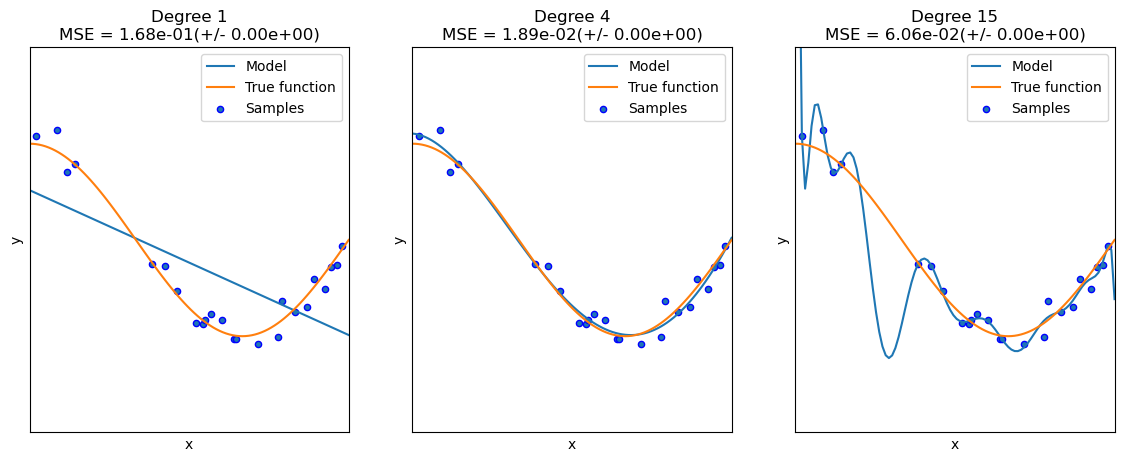

In [49]:
# Plot the true function
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = make_pipeline(polynomial_features, linear_regression)
    pipeline.fit(X_train, y_train)

    # Evaluate the models using cross-validation
    scores = mean_squared_error(pipeline.predict(X_test), y_test)

    X_plot = np.linspace(0, 1, 100)
    plt.plot(X_plot, pipeline.predict(X_plot[:, np.newaxis]), label="Model")
    plt.plot(X_plot, np.cos(1.5 * np.pi * X_plot), label="True function")
    plt.scatter(X_train, y_train, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], scores.mean(), scores.std()))
plt.show()

In the plots above, you will see that the model with degree 1 has high bias and low variance, the model with degree 15 has low bias and high variance, and the model with degree 4 is trying to balance both.